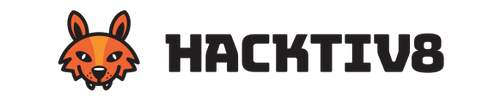

# Assignment 2 - Statistical Treatment for Retail Datasets

Naurah Nadzifah Azizi

PYTN-KS11-003

# Project Overview

**NYC Property Sales**

Source: https://www.kaggle.com/datasets/new-york-city/nyc-property-sales

Using what you’ve learned; download the NYC Property Sales Dataset from Kaggle. This dataset is a record of every building or building unit (apartment, etc.) sold in the New York City property market over a 12-month period.

This dataset contains the location, address, type, sale price, and sale date of building units sold. A reference on the trickier fields:
* BOROUGH: A digit code for the borough the property is located in; in order these are Manhattan (1), Bronx (2), Brooklyn (3), Queens (4), and Staten Island (5).
* BLOCK; LOT: The combination of borough, block, and lot forms a unique key for property in New York City. Commonly called a BBL.
* BUILDING CLASS AT PRESENT and BUILDING CLASS AT TIME OF SALE: The type of building at various points in time.

Note that because this is a financial transaction dataset, there are some points that need to be kept in mind:
* Many sales occur with a nonsensically small dollar amount: $0 most commonly. These sales are actually transfers of deeds between parties: for example, parents transferring ownership to their home to a child after moving out for retirement.
* This dataset uses the financial definition of a building/building unit, for tax purposes. In case a single entity owns the building in question, a sale covers the value of the entire building. In case a building is owned piecemeal by its residents (a condominium), a sale refers to a single apartment (or group of apartments) owned by some individual.

Formulate a question and derive a statistical hypothesis test to answer the question. You have to demonstrate that you’re able to make decisions using data in a scientific manner. Examples of questions can be:
* Is there a difference in unit sold between property built in 1900-2000 and 2001 so on?
* Is there a difference in unit sold based on building category?
* What can you discover about New York City real estate by looking at a year's worth of raw transaction records? Can you spot trends in the market?

## Data Preparation

### Import Library

In [119]:
import math
import statistics
import numpy as np
import scipy.stats
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

### Import Dataset

In [120]:
df = pd.read_csv('nyc-rolling-sales.csv')

View the top 5 rows of data

In [121]:
df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


View the bottom 5 rows of data

In [55]:
df.tail()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,...,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,...,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,...,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,...,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00
84547,8413,5,WOODROW,35 INDOOR PUBLIC AND CULTURAL FACILITIES,4,7105,679,,P9,155 CLAY PIT ROAD,...,0,1,1,10796,2400,2006,4,P9,69300,2016-10-27 00:00:00


View all columns and data types

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

View the header list

In [57]:
df.columns.values

array(['Unnamed: 0', 'BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER',
       'ZIP CODE', 'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE'], dtype=object)

View the number of data rows and columns

In [58]:
df.shape

(84548, 22)

## Data Preprocessing

Drop unnecessary column

In [59]:
df.drop(['Unnamed: 0','EASE-MENT'], axis=1, inplace=True)

Identify object columns

In [60]:
print(df.select_dtypes(['object']).columns)

Index(['NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET',
       'BUILDING CLASS AT TIME OF SALE', 'SALE PRICE', 'SALE DATE'],
      dtype='object')


Identify integer columns

In [61]:
print(df.select_dtypes(['int64']).columns)

Index(['BOROUGH', 'BLOCK', 'LOT', 'ZIP CODE', 'RESIDENTIAL UNITS',
       'COMMERCIAL UNITS', 'TOTAL UNITS', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE'],
      dtype='object')


Convert objects to categorical variables

In [62]:
obj_to_cat = ['NEIGHBORHOOD','BUILDING CLASS CATEGORY','TAX CLASS AT PRESENT','ADDRESS','APARTMENT NUMBER','BUILDING CLASS AT TIME OF SALE']
for col in obj_to_cat:
    df[col]=df[col].astype('category')

Convert numeric to categorical variables

In [63]:
num_to_cat = ['BOROUGH','BLOCK','LOT','ZIP CODE','TAX CLASS AT TIME OF SALE']
for col in num_to_cat:
    df[col]=df[col].astype('category')

Convert object type to integer using pd.to_numeric & set errors to 'coerce'; ie. changes to NaN

In [64]:
obj_to_int = ['LAND SQUARE FEET','GROSS SQUARE FEET','SALE PRICE']
for col in obj_to_int:
    df[col] = pd.to_numeric(df[col],errors='coerce')

Change datatype SALE DATE to date time

In [65]:
df['SALE DATE'] = pd.to_datetime(df['SALE DATE'])

Check DataFrame

In [66]:
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,,10009,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,,10009,28,3,31,4616.0,18690.0,1900,2,C7,NaN,2016-12-14
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,,10009,16,1,17,2212.0,7803.0,1900,2,C7,NaN,2016-12-09
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,,10009,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,,10009,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17


Check data types

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         84548 non-null  category      
 1   NEIGHBORHOOD                    84548 non-null  category      
 2   BUILDING CLASS CATEGORY         84548 non-null  category      
 3   TAX CLASS AT PRESENT            84548 non-null  category      
 4   BLOCK                           84548 non-null  category      
 5   LOT                             84548 non-null  category      
 6   BUILDING CLASS AT PRESENT       84548 non-null  object        
 7   ADDRESS                         84548 non-null  category      
 8   APARTMENT NUMBER                84548 non-null  category      
 9   ZIP CODE                        84548 non-null  category      
 10  RESIDENTIAL UNITS               84548 non-null  int64         
 11  CO

Rename Column

In [68]:
df.columns = df.columns.str.replace(' ','_')
df.columns = df.columns.str.lower()
df.columns

Index(['borough', 'neighborhood', 'building_class_category',
       'tax_class_at_present', 'block', 'lot', 'building_class_at_present',
       'address', 'apartment_number', 'zip_code', 'residential_units',
       'commercial_units', 'total_units', 'land_square_feet',
       'gross_square_feet', 'year_built', 'tax_class_at_time_of_sale',
       'building_class_at_time_of_sale', 'sale_price', 'sale_date'],
      dtype='object')

Create a new column for age of the unit

In [69]:
df['age'] = 2023 - df['year_built']
df

,borough,neighborhood,building_class_category,tax_class_at_present,block,lot,building_class_at_present,address,apartment_number,zip_code,...,commercial_units,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,sale_price,sale_date,age
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,,10009,...,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19,123
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,,10009,...,3,31,4616.0,18690.0,1900,2,C7,NaN,2016-12-14,123
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,,10009,...,1,17,2212.0,7803.0,1900,2,C7,NaN,2016-12-09,123
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,,10009,...,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23,110
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,,10009,...,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17,123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,B9,37 QUAIL LANE,,10309,...,0,2,2400.0,2575.0,1998,1,B9,450000.0,2016-11-28,25
84544,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,B9,32 PHEASANT LANE,,10309,...,0,2,2498.0,2377.0,1998,1,B9,550000.0,2017-04-21,25
84545,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,B2,49 PITNEY AVENUE,,10309,...,0,2,4000.0,1496.0,1925,1,B2,460000.0,2017-07-05,98
84546,5,WOODROW,22 STORE BUILDINGS,4,7100,28,K6,2730 ARTHUR KILL ROAD,,10309,...,7,7,208033.0,64117.0,2001,4,K6,11693337.0,2016-12-21,22


Set numerical indicators for boroughs as type str to distinguish boroughs 

In [70]:
df['borough'] = df['borough'].map({1:'Manhattan',2:'Bronx',3:'Brooklyn',4:'Queens',5:'Staten Island'})
df.head()

,borough,neighborhood,building_class_category,tax_class_at_present,block,lot,building_class_at_present,address,apartment_number,zip_code,...,commercial_units,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,sale_price,sale_date,age
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,,10009,...,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19,123
1,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,,10009,...,3,31,4616.0,18690.0,1900,2,C7,NaN,2016-12-14,123
2,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,,10009,...,1,17,2212.0,7803.0,1900,2,C7,NaN,2016-12-09,123
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,,10009,...,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23,110
4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,,10009,...,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17,123


Check missing value

In [71]:
df.isna().sum()

borough                               0
neighborhood                          0
building_class_category               0
tax_class_at_present                  0
block                                 0
lot                                   0
building_class_at_present             0
address                               0
apartment_number                      0
zip_code                              0
residential_units                     0
commercial_units                      0
total_units                           0
land_square_feet                  26252
gross_square_feet                 27612
year_built                            0
tax_class_at_time_of_sale             0
building_class_at_time_of_sale        0
sale_price                        14561
sale_date                             0
age                                   0
dtype: int64

Remove missing value

In [72]:
df = df.dropna()

Recheck the count of missing values

In [73]:
df.isna().sum()

borough                           0
neighborhood                      0
building_class_category           0
tax_class_at_present              0
block                             0
lot                               0
building_class_at_present         0
address                           0
apartment_number                  0
zip_code                          0
residential_units                 0
commercial_units                  0
total_units                       0
land_square_feet                  0
gross_square_feet                 0
year_built                        0
tax_class_at_time_of_sale         0
building_class_at_time_of_sale    0
sale_price                        0
sale_date                         0
age                               0
dtype: int64

Convert from scientific notation to describe dataset

In [74]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
residential_units,48244.0,2.566537e+00,1.746548e+01,0.0,1.0,1.0,2.0,1.844000e+03
commercial_units,48244.0,2.491709e-01,1.098807e+01,0.0,0.0,0.0,0.0,2.261000e+03
total_units,48244.0,2.834632e+00,2.075042e+01,0.0,1.0,1.0,2.0,2.261000e+03
land_square_feet,48244.0,3.358117e+03,3.143590e+04,0.0,1413.0,2140.0,3071.0,4.228300e+06
gross_square_feet,48244.0,3.669753e+03,2.947491e+04,0.0,828.0,1620.0,2520.0,3.750565e+06
year_built,48244.0,1.827765e+03,4.643612e+02,0.0,1920.0,1931.0,1961.0,2.017000e+03
sale_price,48244.0,1.153281e+06,1.340131e+07,0.0,80420.0,480000.0,830000.0,2.210000e+09
age,48244.0,1.952348e+02,4.643612e+02,6.0,62.0,92.0,103.0,2.023000e+03


There are minimum values of zero for columns that do not make sense. For example, year built has a minimum value of 0

Check dataframe where year_built is 0 years

In [75]:
df[df['year_built']==0]

,borough,neighborhood,building_class_category,tax_class_at_present,block,lot,building_class_at_present,address,apartment_number,zip_code,...,commercial_units,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,sale_price,sale_date,age
18364,Bronx,BATHGATE,29 COMMERCIAL GARAGES,4,2918,29,G7,1885 BATHGATE AVENUE,,10457,...,0,0,3070.0,0.0,0,4,G7,2500000.0,2016-12-15,2023
18371,Bronx,BATHGATE,31 COMMERCIAL VACANT LAND,4,3028,13,V9,1996 WEBSTER AVENUE,,0,...,0,0,5945.0,0.0,0,4,V9,1200000.0,2016-10-19,2023
18373,Bronx,BATHGATE,41 TAX CLASS 4 - OTHER,4,2900,1,Z9,1816 WEBSTER AVENUE,,10457,...,0,0,3082.0,0.0,0,4,Z9,300000.0,2016-11-03,2023
18756,Bronx,BAYCHESTER,05 TAX CLASS 1 VACANT LAND,1B,4725,26,V0,1475 HICKS STREET,,10469,...,0,0,2375.0,0.0,0,1,V0,98000.0,2016-10-31,2023
18757,Bronx,BAYCHESTER,05 TAX CLASS 1 VACANT LAND,1B,4726,38,V0,3552 EASTCHESTER ROAD,,10469,...,0,0,3400.0,0.0,0,1,V0,0.0,2017-03-16,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53841,Queens,CORONA,07 RENTALS - WALKUP APARTMENTS,2B,1785,22,C1,112-48 38TH AVENUE,,11368,...,0,8,2500.0,6875.0,0,2,C1,2153222.0,2017-05-10,2023
54054,Queens,CORONA,41 TAX CLASS 4 - OTHER,4,1961,1,Z9,5506 VAN CLEEF STREET,,11368,...,0,0,926.0,384.0,0,4,Z9,113000.0,2017-08-09,2023
57321,Queens,FLUSHING-NORTH,08 RENTALS - ELEVATOR APARTMENTS,2B,5186,56,D3,142-11 CHERRY AVENUE,,11355,...,0,10,2850.0,10111.0,0,2,D3,4000000.0,2017-05-19,2023
65906,Queens,LITTLE NECK,01 ONE FAMILY DWELLINGS,1,8229,80,A3,45-39 BROWVALE LANE,,11362,...,0,1,9562.0,5291.0,0,1,A3,1731025.0,2017-04-06,2023


Based on the condition set for the dataframe where year_built is less than 1, there are 2911 rows/observations where the year_built for the building is 0 years old

Remove rows where year_built = 0

In [76]:
df = df[df['year_built']!=0]
df

,borough,neighborhood,building_class_category,tax_class_at_present,block,lot,building_class_at_present,address,apartment_number,zip_code,...,commercial_units,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,sale_price,sale_date,age
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,,10009,...,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19,123
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,,10009,...,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23,110
4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,,10009,...,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17,123
6,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,C4,210 AVENUE B,,10009,...,0,8,1750.0,4226.0,1920,2,C4,3192840.0,2016-09-23,103
9,Manhattan,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,D9,629 EAST 5TH STREET,,10009,...,0,24,4489.0,18523.0,1920,2,D9,16232000.0,2016-11-07,103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,B9,37 QUAIL LANE,,10309,...,0,2,2400.0,2575.0,1998,1,B9,450000.0,2016-11-28,25
84544,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,B9,32 PHEASANT LANE,,10309,...,0,2,2498.0,2377.0,1998,1,B9,550000.0,2017-04-21,25
84545,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,B2,49 PITNEY AVENUE,,10309,...,0,2,4000.0,1496.0,1925,1,B2,460000.0,2017-07-05,98
84546,Staten Island,WOODROW,22 STORE BUILDINGS,4,7100,28,K6,2730 ARTHUR KILL ROAD,,10309,...,7,7,208033.0,64117.0,2001,4,K6,11693337.0,2016-12-21,22


Check other values where land and gross square feet is zero as these may be potential outliers

In [77]:
df[df['land_square_feet']==0]

,borough,neighborhood,building_class_category,tax_class_at_present,block,lot,building_class_at_present,address,apartment_number,zip_code,...,commercial_units,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,sale_price,sale_date,age
18354,Bronx,BATHGATE,10 COOPS - ELEVATOR APARTMENTS,2,3035,48,D4,"463 EAST 178TH STREET, 6E",,10457,...,0,0,0.0,0.0,1935,2,D4,40000.0,2017-04-17,88
18355,Bronx,BATHGATE,10 COOPS - ELEVATOR APARTMENTS,2,3035,48,D4,"463 EAST 178TH ST, 6B",,10457,...,0,0,0.0,0.0,1935,2,D4,40000.0,2017-04-17,88
18356,Bronx,BATHGATE,10 COOPS - ELEVATOR APARTMENTS,2,3044,40,D4,"495 E 178TH STREET, 2H",,10457,...,0,0,0.0,0.0,1941,2,D4,60000.0,2016-12-01,82
18746,Bronx,BAYCHESTER,04 TAX CLASS 1 CONDOS,1A,4795,1009,R3,2877 ELY AVENUE,3,10469,...,0,1,0.0,0.0,2008,1,R3,310000.0,2017-02-28,15
18747,Bronx,BAYCHESTER,04 TAX CLASS 1 CONDOS,1A,4795,1027,R3,2853 ELY AVENUE,3,10469,...,0,1,0.0,0.0,2008,1,R3,342500.0,2017-07-31,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49292,Brooklyn,WINDSOR TERRACE,44 CONDO PARKING,4,5287,1035,RP,207 PROSPECT PARK SW,P35,11218,...,0,1,0.0,0.0,1990,4,RP,0.0,2017-07-25,33
49293,Brooklyn,WINDSOR TERRACE,44 CONDO PARKING,4,5287,1035,RP,207 PROSPECT PARK SW,P35,11218,...,0,1,0.0,0.0,1990,4,RP,0.0,2017-07-17,33
49294,Brooklyn,WINDSOR TERRACE,47 CONDO NON-BUSINESS STORAGE,4,895,1213,RS,11 TERRACE PLACE,S2,11218,...,0,1,0.0,0.0,2006,4,RS,0.0,2016-10-06,17
49295,Brooklyn,WINDSOR TERRACE,47 CONDO NON-BUSINESS STORAGE,4,895,1219,RS,11 TERRACE PLACE,S8,11218,...,0,1,0.0,0.0,2006,4,RS,0.0,2016-10-24,17


In [78]:
df[df['gross_square_feet']==0]

,borough,neighborhood,building_class_category,tax_class_at_present,block,lot,building_class_at_present,address,apartment_number,zip_code,...,commercial_units,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,sale_price,sale_date,age
18354,Bronx,BATHGATE,10 COOPS - ELEVATOR APARTMENTS,2,3035,48,D4,"463 EAST 178TH STREET, 6E",,10457,...,0,0,0.0,0.0,1935,2,D4,40000.0,2017-04-17,88
18355,Bronx,BATHGATE,10 COOPS - ELEVATOR APARTMENTS,2,3035,48,D4,"463 EAST 178TH ST, 6B",,10457,...,0,0,0.0,0.0,1935,2,D4,40000.0,2017-04-17,88
18356,Bronx,BATHGATE,10 COOPS - ELEVATOR APARTMENTS,2,3044,40,D4,"495 E 178TH STREET, 2H",,10457,...,0,0,0.0,0.0,1941,2,D4,60000.0,2016-12-01,82
18746,Bronx,BAYCHESTER,04 TAX CLASS 1 CONDOS,1A,4795,1009,R3,2877 ELY AVENUE,3,10469,...,0,1,0.0,0.0,2008,1,R3,310000.0,2017-02-28,15
18747,Bronx,BAYCHESTER,04 TAX CLASS 1 CONDOS,1A,4795,1027,R3,2853 ELY AVENUE,3,10469,...,0,1,0.0,0.0,2008,1,R3,342500.0,2017-07-31,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49292,Brooklyn,WINDSOR TERRACE,44 CONDO PARKING,4,5287,1035,RP,207 PROSPECT PARK SW,P35,11218,...,0,1,0.0,0.0,1990,4,RP,0.0,2017-07-25,33
49293,Brooklyn,WINDSOR TERRACE,44 CONDO PARKING,4,5287,1035,RP,207 PROSPECT PARK SW,P35,11218,...,0,1,0.0,0.0,1990,4,RP,0.0,2017-07-17,33
49294,Brooklyn,WINDSOR TERRACE,47 CONDO NON-BUSINESS STORAGE,4,895,1213,RS,11 TERRACE PLACE,S2,11218,...,0,1,0.0,0.0,2006,4,RS,0.0,2016-10-06,17
49295,Brooklyn,WINDSOR TERRACE,47 CONDO NON-BUSINESS STORAGE,4,895,1219,RS,11 TERRACE PLACE,S8,11218,...,0,1,0.0,0.0,2006,4,RS,0.0,2016-10-24,17


Remove outliers of zero gross square feet and land square feet

In [79]:
df = df[df['land_square_feet']!=0]
df = df[df['gross_square_feet']!=0]

df.describe().T

,count,mean,std,min,25%,50%,75%,max
residential_units,36805.0,3.182095e+00,1.982145e+01,0.0,1.0,2.0,2.0,1.844000e+03
commercial_units,36805.0,3.231898e-01,1.257908e+01,0.0,0.0,0.0,0.0,2.261000e+03
total_units,36805.0,3.504062e+00,2.360379e+01,0.0,1.0,2.0,2.0,2.261000e+03
land_square_feet,36805.0,4.197334e+03,3.577842e+04,200.0,2000.0,2500.0,3800.0,4.228300e+06
gross_square_feet,36805.0,4.790491e+03,3.363749e+04,60.0,1428.0,2000.0,2898.0,3.750565e+06
year_built,36805.0,1.939078e+03,3.028128e+01,1800.0,1920.0,1930.0,1955.0,2.017000e+03
sale_price,36805.0,1.305841e+06,1.518571e+07,0.0,160000.0,504237.0,840000.0,2.210000e+09
age,36805.0,8.392189e+01,3.028128e+01,6.0,68.0,93.0,103.0,2.230000e+02


There are now a total of 36,805 observations in the housing dataset

Simple scatter plot to find potential outliers

<AxesSubplot:xlabel='age', ylabel='sale_price'>

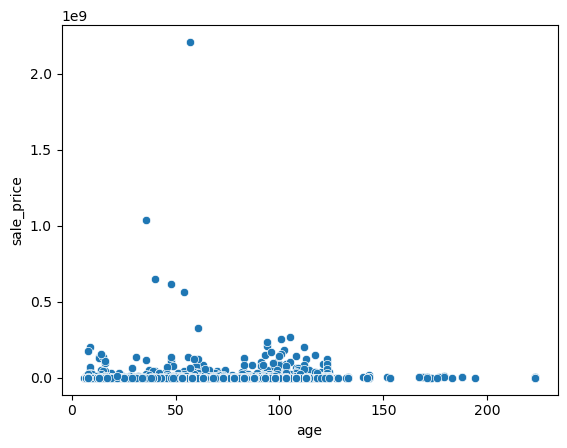

In [80]:
sns.scatterplot(data=df, x='age', y='sale_price')

Remove these outliers for the purposes of this analysis

In [81]:
df = df[(df['sale_price'] >200000) & (df['sale_price'] < 800000)]

<AxesSubplot:xlabel='age', ylabel='sale_price'>

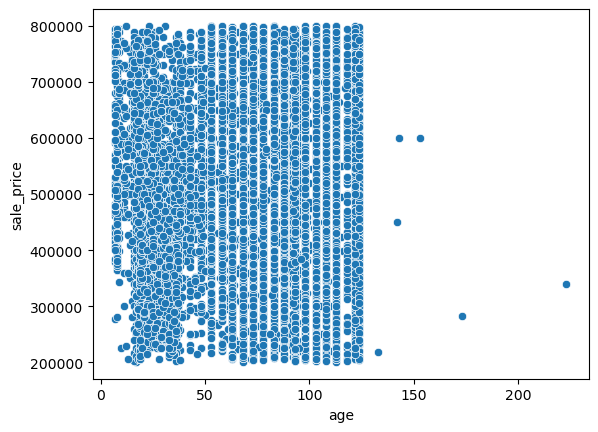

In [82]:
sns.scatterplot(data=df, x='age', y='sale_price')

In [83]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
residential_units,17136.0,1.780696,14.832153,0.0,1.0,1.0,2.00,1844.0
commercial_units,17136.0,0.189192,17.304001,0.0,0.0,0.0,0.00,2261.0
total_units,17136.0,1.968429,22.888736,0.0,1.0,1.0,2.00,2261.0
land_square_feet,17136.0,3583.644083,38524.138275,200.0,2000.0,2500.0,3580.25,4228300.0
gross_square_feet,17136.0,2250.419876,29838.443750,120.0,1252.0,1600.0,2100.00,3750565.0
year_built,17136.0,1944.503093,30.388798,1800.0,1920.0,1935.0,1960.00,2016.0
sale_price,17136.0,508670.900735,150291.706986,200600.0,397500.0,500000.0,630000.00,799999.0
age,17136.0,78.496907,30.388798,7.0,63.0,88.0,103.00,223.0


Check dataframe where total_units is 0

In [84]:
df[df['total_units']==0]

,borough,neighborhood,building_class_category,tax_class_at_present,block,lot,building_class_at_present,address,apartment_number,zip_code,...,commercial_units,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,sale_price,sale_date,age
5603,Manhattan,HARLEM-CENTRAL,37 RELIGIOUS FACILITIES,4,1771,44,M9,170-174 EAST 123 STREET,,10035,...,0,0,5973.0,24626.0,1900,4,M9,330000.0,2017-06-06,123
32125,Brooklyn,BUSHWICK,37 RELIGIOUS FACILITIES,4,3408,5,M1,1595 BROADWAY,,11207,...,0,0,7840.0,9520.0,1910,4,M1,500000.0,2017-05-17,113
37616,Brooklyn,FLATBUSH-CENTRAL,11 SPECIAL CONDO BILLING LOTS,2,5147,7501,R0,1600 BEVERLEY ROAD,,11226,...,0,0,5200.0,30000.0,2007,2,R0,600000.0,2016-09-13,16
37693,Brooklyn,FLATBUSH-CENTRAL,29 COMMERCIAL GARAGES,4,5141,23,G4,571 CONEY ISLAND AVENUE,,11218,...,0,0,9352.0,1782.0,1952,4,G4,500000.0,2017-06-13,71
38538,Brooklyn,FLATBUSH-EAST,37 RELIGIOUS FACILITIES,4,7927,6,M1,5109 FOSTER AVENUE,,11203,...,0,0,4000.0,1185.0,1974,4,M1,360000.0,2016-10-20,49
40372,Brooklyn,GRAVESEND,06 TAX CLASS 1 - OTHER,1,6916,47,G0,168 BAY 49TH STREET,,11214,...,0,0,3160.0,300.0,1930,1,G0,615000.0,2017-03-03,93
41642,Brooklyn,MADISON,37 RELIGIOUS FACILITIES,4,6810,1,M1,2702 QUENTIN ROAD,,11229,...,0,0,16500.0,5490.0,1925,4,M1,745720.0,2017-07-12,98
62059,Queens,GLENDALE,37 RELIGIOUS FACILITIES,4,3718,70,M1,77-11 64TH PLACE,,11385,...,0,0,4000.0,3240.0,1931,4,M1,675000.0,2017-04-24,92
67578,Queens,MIDDLE VILLAGE,29 COMMERCIAL GARAGES,4,3802,2,G1,79-01 COOPER AVENUE,,11385,...,0,0,1450.0,1450.0,1931,4,G1,650000.0,2016-12-15,92
82013,Staten Island,PRINCES BAY,21 OFFICE BUILDINGS,4,6760,49,O1,6054 AMBOY ROAD,,10309,...,0,0,7160.0,1084.0,1931,4,O1,420000.0,2016-09-29,92


Remove rows where total_units = 0

In [85]:
df = df[df['total_units']!=0]
df

,borough,neighborhood,building_class_category,tax_class_at_present,block,lot,building_class_at_present,address,apartment_number,zip_code,...,commercial_units,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,sale_price,sale_date,age
223,Manhattan,CHELSEA,07 RENTALS - WALKUP APARTMENTS,2B,765,25,C4,219 WEST 15TH STREET,,10011,...,0,9,1566.0,6330.0,1901,2,C4,416790.0,2017-08-31,122
224,Manhattan,CHELSEA,07 RENTALS - WALKUP APARTMENTS,2B,765,25,C4,219 WEST 15TH STREET,,10011,...,0,9,1566.0,6330.0,1901,2,C4,630370.0,2017-08-31,122
277,Manhattan,CHELSEA,09 COOPS - WALKUP APARTMENTS,2,744,32,C6,309 WEST 20TH STREET,,10011,...,0,24,4600.0,12200.0,1850,2,C6,282000.0,2016-10-19,173
2062,Manhattan,FASHION,23 LOFT BUILDINGS,4,805,39,L1,115-123 W 29TH,,10001,...,15,15,6994.0,79465.0,1913,4,L1,220000.0,2016-12-19,110
2587,Manhattan,FLATIRON,08 RENTALS - ELEVATOR APARTMENTS,2,844,8,D6,9 EAST 16TH STREET,,10003,...,1,16,4600.0,30680.0,1900,2,D6,489854.0,2017-01-27,123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84540,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7316,93,B2,125 DARNELL LANE,,10309,...,0,2,3325.0,1300.0,1995,1,B2,509000.0,2016-10-31,28
84541,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7317,126,B2,112 ROBIN COURT,,10309,...,0,2,11088.0,2160.0,1994,1,B2,648000.0,2016-12-07,29
84543,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,B9,37 QUAIL LANE,,10309,...,0,2,2400.0,2575.0,1998,1,B9,450000.0,2016-11-28,25
84544,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,B9,32 PHEASANT LANE,,10309,...,0,2,2498.0,2377.0,1998,1,B9,550000.0,2017-04-21,25


check duplicate data

In [86]:
df.duplicated().sum()

41

remove duplicate data

In [87]:
df.drop_duplicates(inplace=True)

In [88]:
df.describe()

,residential_units,commercial_units,total_units,land_square_feet,gross_square_feet,year_built,sale_price,age
count,17085.000000,17085.000000,17085.000000,1.708500e+04,1.708500e+04,17085.000000,17085.000000,17085.000000
mean,1.764413,0.187709,1.950658,3.405334e+03,2.179239e+03,1944.501258,508856.807609,78.498742
std,14.688056,17.329456,22.812547,3.638677e+04,2.957164e+04,30.385563,150190.375117,30.385563
min,0.000000,0.000000,1.000000,2.000000e+02,1.200000e+02,1800.000000,200600.000000,7.000000
25%,1.000000,0.000000,1.000000,2.000000e+03,1.252000e+03,1920.000000,398000.000000,63.000000
50%,1.000000,0.000000,1.000000,2.500000e+03,1.598000e+03,1935.000000,500000.000000,88.000000
75%,2.000000,0.000000,2.000000,3.567000e+03,2.100000e+03,1960.000000,630000.000000,103.000000
max,1844.000000,2261.000000,2261.000000,4.228300e+06,3.750565e+06,2016.000000,799999.000000,223.000000


## Exploratory Data Analysis

### Measure of Central Tendency: Mean

Calculate sale_price's mean of each borough

In [89]:
mean_saleprice = df[['borough','sale_price']].groupby('borough').mean().sort_values(by='sale_price',ascending=True)
mean_saleprice

,sale_price
borough,
Bronx,474793.641202
Staten Island,486786.981697
Manhattan,500498.130435
Queens,521182.565133
Brooklyn,539760.350118


From the table above, it can be seen that Brooklyn has the highest average among the other boroughs

### Measure of Central Tendency: Median

Calculate sale_price's median of each borough

In [91]:
med_saleprice = df[['borough','sale_price']].groupby('borough').median().sort_values(by='sale_price',ascending=True)
med_saleprice

,sale_price
borough,
Bronx,469887.5
Staten Island,480000.0
Queens,515000.0
Manhattan,530000.0
Brooklyn,548500.0


From the table above, it can be seen that Brooklyn has the highest median of the other boroughs

### Measure of Central Tendency: Modus

Calculate total_unit's mode of each borough

In [92]:
mode = df[['borough','total_units']].groupby(['borough']).apply(pd.DataFrame.mode).reset_index(drop=True)
mode

,borough,total_units
0,Manhattan,2
1,Bronx,2
2,Brooklyn,2
3,Queens,1
4,Staten Island,1


From the table above, it can be seen that Manhattan, Bronx, and Brooklyn have 2 units, while Queens and Staten Island have 1 unit

### Measure of Spread : Range

calculate sale_price's range of each borough

In [93]:
range = df.groupby('borough').apply(lambda x: x['sale_price'].max() - x['sale_price'].min())
range

borough
Manhattan        514360.0
Bronx            596500.0
Brooklyn         596500.0
Queens           599399.0
Staten Island    597600.0
dtype: float64

The house price range of each region in New York is not much different, around 500,000 dollars

### Measure of Spread: Variance

calculate variance of each borough

In [94]:
var = df.groupby('borough').var()
var

,residential_units,commercial_units,total_units,land_square_feet,gross_square_feet,year_built,sale_price,age
borough,,,,,,,,
Manhattan,952.632411,51.584980,929.988142,8.127139e+06,1.078200e+09,861.450593,2.844121e+10,861.450593
Bronx,3.250691,0.077980,3.251972,2.383003e+06,4.058381e+06,912.706578,1.875762e+10,912.706578
Brooklyn,26.840987,0.166602,26.901012,3.527475e+08,6.481243e+07,807.551281,2.352110e+10,807.551281
Queens,529.218942,761.174669,1301.610769,2.668025e+09,2.115313e+09,474.141992,2.423372e+10,474.141992
Staten Island,1.168499,3.810874,4.870449,8.317188e+08,1.112017e+08,1021.897381,1.933269e+10,1021.897381


Most of all borough has high variance value, which is means that data has big distribution

### Measure of Spread : Standar Deviation

calculate standard deviation of each borough

In [95]:
sd = df.groupby('borough').std()
sd

,residential_units,commercial_units,total_units,land_square_feet,gross_square_feet,year_built,sale_price,age
borough,,,,,,,,
Manhattan,30.864744,7.182268,30.495707,2850.813805,32835.960193,29.350479,168645.230850,29.350479
Bronx,1.802967,0.279249,1.803323,1543.697720,2014.542464,30.211034,136958.451437,30.211034
Brooklyn,5.180829,0.408170,5.186619,18781.572919,8050.616614,28.417447,153365.901991,28.417447
Queens,23.004759,27.589394,36.077843,51652.923847,45992.529458,21.774802,155671.846188,21.774802
Staten Island,1.080971,1.952146,2.206909,28839.535537,10545.219394,31.967130,139042.049134,31.967130


Most of all borough has high standard deviation value, which is means that data has big distribution

### Probability Distribution

create probability distribution of Bronx' sale price

[Text(0.5, 0, 'Price'),
 Text(0, 0.5, 'Probability of Occurence'),
 Text(0.5, 1.0, 'Distribution of Sale Price in Bronx')]

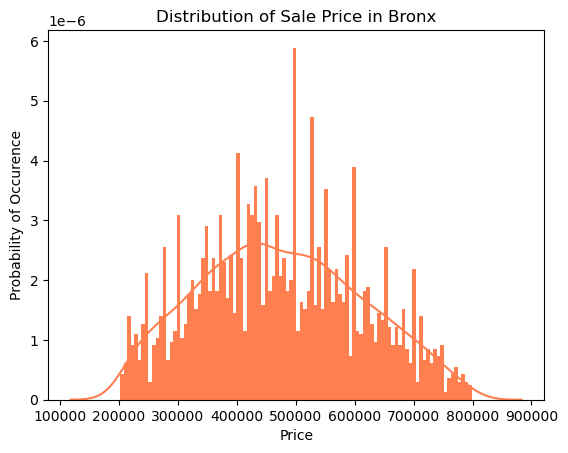

In [99]:
borough = df.groupby('borough')
bronx = borough.get_group('Bronx')
ax = sns.distplot(bronx['sale_price'],
                 kde=True,
                 bins=100,
                 color='coral',
                 hist_kws={'linewidth':15,'alpha':1})
ax.set(xlabel='Price', ylabel='Probability of Occurence', title='Distribution of Sale Price in Bronx')

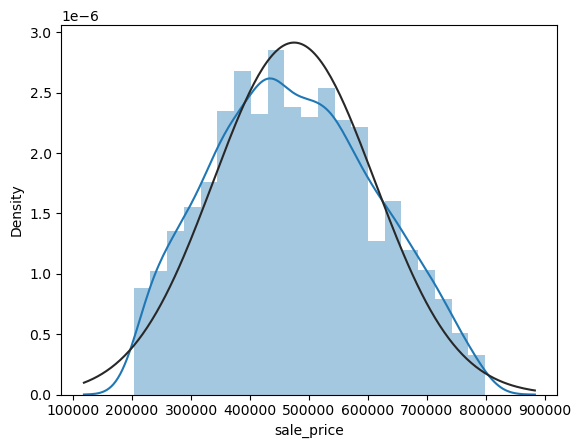

In [102]:
x = pd.Series(bronx['sale_price'].values, name='sale_price')
ax = sns.distplot(x, fit=norm, kde=True)

From distribution plot above we know that Bronx's sale price follow a normal distribution

### Confidence Interval

create a dataframe

In [103]:
ci = df.groupby('borough').agg({'sale_price': [np.mean, np.std, np.size]})
ci

sale_price                     
                        mean            std  size
borough                                          
Manhattan      500498.130435  168645.230850    23
Bronx          474793.641202  136958.451437  2762
Brooklyn       539760.350118  153365.901991  3376
Queens         521182.565133  155671.846188  6717
Staten Island  486786.981697  139042.049134  4207

calculate formula

In [104]:
mean_ = ci.iloc[1,0]
sd = ci.iloc[1,1]
n = ci.iloc[1,2]
z = 1.96
se = sd/np.sqrt(n)

In [105]:
print('lower bound: ',mean_ - z* se)
print('upper bound: ',mean_ + z* se)

lower bound:  469685.85075989907
upper bound:  479901.43164415593


The average of the actual Sale Price will be between 469685.85075989907 and 479901.43164415593

### Hypothesis Testing

H0: Average property prices in Manhattan are equal to average property prices in Brooklyn

Ha: Average property prices in Manhattan are different from average property prices in Brooklyn

In [106]:
borough = pd.DataFrame(df[['borough','sale_price']])
borough

,borough,sale_price
223,Manhattan,416790.0
224,Manhattan,630370.0
277,Manhattan,282000.0
2062,Manhattan,220000.0
2587,Manhattan,489854.0
...,...,...
84540,Staten Island,509000.0
84541,Staten Island,648000.0
84543,Staten Island,450000.0
84544,Staten Island,550000.0


In [113]:
Manhattan = borough[df['borough']=='Manhattan']
Brooklyn = borough[df['borough']=='Brooklyn']

Calculated the average value of property prices in Manhattan and the number of samples used to calculate the average

In [114]:
n1 = len(Manhattan)
mean1 = Manhattan['sale_price'].mean()

n1, mean1

(23, 500498.1304347826)

Calculated the average value of property prices in Brooklyn and the number of samples used to calculate the average

In [115]:
n2 = len(Brooklyn)
mean2 = Brooklyn['sale_price'].mean()

n2, mean2

(3376, 539760.3501184834)

Conduct hypothesis testing using the z-test method on property price data in Manhattan and Brooklyn

In [118]:
sm.stats.ztest(Manhattan['sale_price'].dropna(),
              Brooklyn['sale_price'].dropna(),
              alternative='two-sided')

(-1.2227611139547212, 0.22141993666300375)

Obtained a p-value> 0.05, namely 0.22 so that H0 is accepted, which means that the average property price in Manhattan is the same as the average property price in Brooklyn

**Overall Analysis**
* The highest average sale in NYC is in the borough of Brooklyn with an average of 539760.350118.
* The mode of total units in each borough is Manhattan, Bronx, and Brooklyn with 2, while Queens and Staten Island with 1.
* The sales range in NYC for each borough is not much different at $500,000.
* Most of all borough has high variance and standard deviation value, which is means that data has big distribution